Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU7proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU7proj.ipynb"

In [54]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-jmf32eti
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-jmf32eti
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [55]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm
import preliz as pz

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



In [22]:
bball = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv')

In [23]:
bball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


# Introduction

In this project I wanted to see how much NBA coaches value defense. I wanted to see if players with more defensive stats like steals and blocks get more minutes. To do this I used the basketball data set and only used players with at least 100 minutes played. I made two models, a b-spline model and a gaussian process model, and compared the two using elpd_loo.

In [25]:
bball = bball.query('MP>99')
bball = bball[['Player', 'Pos', 'MP', 'STL', 'BLK', 'PF']]
bball

,Player,Pos,MP,STL,BLK,PF
0,Precious Achiuwa,PF-C,1624,46,68,143
1,Bam Adebayo,C,2416,81,66,159
2,Ochai Agbaji,SG,1641,47,44,117
3,Santi Aldama,PF,1618,43,54,89
4,Nickeil Alexander-Walker,SG,1921,64,42,143
...,...,...,...,...,...,...
567,Thaddeus Young,PF,439,23,5,49
568,Trae Young,PG,1942,72,11,109
569,Omer Yurtseven,C,545,8,18,52
570,Cody Zeller,C,320,9,5,45


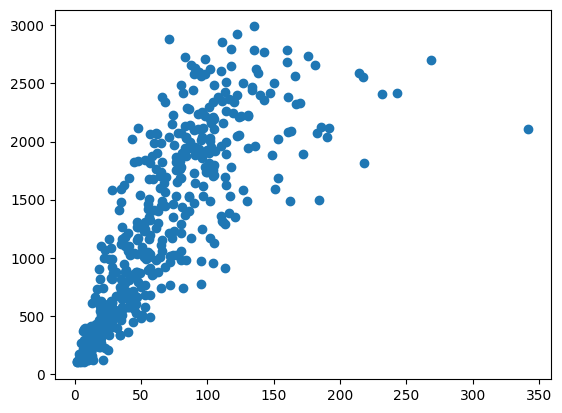

In [99]:
plt.scatter(x=(bball.STL+bball.BLK), y=bball.MP)

# Data

It can be seen in the graph above that there is a somewhat linear relationship between the amount of defensive stats a player has and the amount of minutes they play. Meaning a player with more defensive stats will play more.

In [95]:
num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline = bmb.Model("'MP' ~ bs(STL, degree=3, knots=knots) + bs(BLK, degree=3, knots=knots) + bs(PF, degree=3, knots=knots)", bball, family="gaussian")
idata_spline = model_spline.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


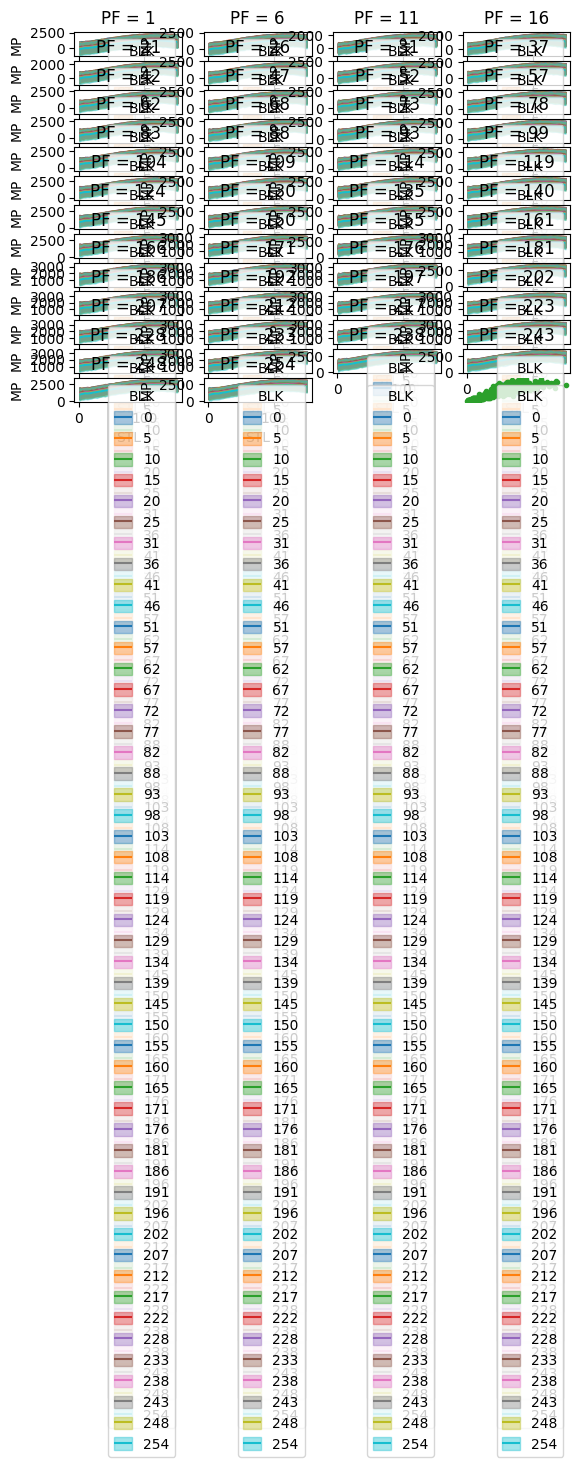

In [100]:
bmb.interpret.plot_predictions(model_spline, idata_spline, ["STL", "BLK", "PF"], pps= True)
plt.plot(bball.STL + bball.BLK + bball.PF, bball.MP, "C2.", zorder=-3)

# B-Spline Model

It can be seen that my b-spline model does a pretty good job of predicting the amount of minutes a player plays. I ended up adding personal fouls as a predictor because I assumed that as a defensive player having more fouls means you are on the court for a longer period of time.

In [74]:
stl = bball.STL.values[:,None]
blk = bball.BLK.values[:,None]
pf = bball.PF.values[:,None]
mp = bball.MP.values

In [40]:
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.96, plot=False):
    """
    Returns a weakly informative prior for the length-scale parameter of the GP kernel.
    """

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

In [97]:
with pm.Model() as model_hsgp:
    #prior for our smoothness parameter
    l = pm.InverseGamma('l', **get_ig_params(stl + blk + pf))

    #this is our kernal, which decides how our points relate to one another
    cov = pm.gp.cov.ExpQuad(1, ls=l)
    #this specfices that we're using an HSGP
    gp = pm.gp.HSGP(m=[10], c=1.5, cov_func=cov)

    #f is for function, as in the function we use to transform our data
    f = gp.prior('f', X=(stl + blk + pf))
    #prior for the neg binomial
    α = pm.HalfNormal('α', 1)
    #likelihood
    y = pm.NegativeBinomial("y", np.exp(f), α, observed=mp)

    idata_hsgp = pm.sample(idata_kwargs={'log_likelihood': True})

Output()

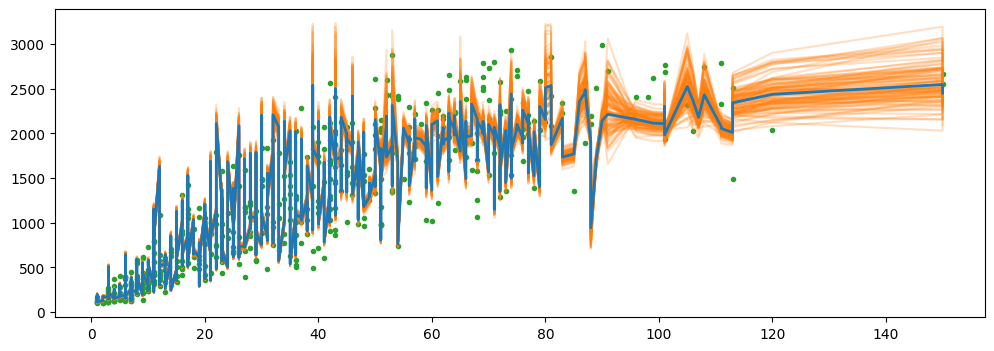

In [88]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
#plot raw data
ax.plot(bball["STL"].values, bball["MP"].values, "C2.")

#grab posterior
f = az.extract(idata_hsgp, group="posterior", var_names="f")


idx = np.argsort(bball["STL"].values)
#plot samples of the posterior
ax.plot(bball["STL"].values[idx], np.exp(f.values[idx,:100]), alpha=0.25, color="C1")
#plot posterior mean
ax.plot(bball["STL"].values[idx], np.exp(f.values[idx].mean(1)), color="C0", lw=2)

# GP Model

I made a gaussian procces model to see if it could do better than my b-spline model. I couldn't figure out how to get it to graph all of the predictors, but I got all the predictors in the idata so my elpd_loo number is still correct. The GP model did pretty well and even though it looks a little all over the place it still graphs the relationship pretty well.

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

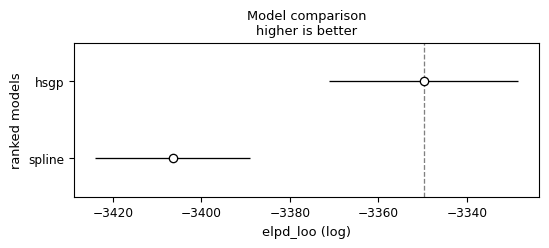

In [98]:
compare = az.compare({"spline":idata_spline, "hsgp":idata_hsgp})
az.plot_compare(compare)

# ELPD

It can be seen that the GP model did significantly better than the b-spline model when predicting minutes played.

# Conclusion

The GP model is the better model and the one to use when predicting minutes played. However, while this prediction can be an interesting thing to look at it could also be thought of as a self-fulfilling prophecy. It can be looked at as the more defensive stats a player has the more minutes they play, but it can also be viewed as the more minutes a player plays the more defensive stats they have.